In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# entradas
L = 1.0
T = 0.5  #tiempo max
m = 10
n = 50
alfa = 1

In [3]:
#paso 1
h = L/m
k = T/n
r = round(alfa**2*k/h**2,6)
print(h,k,r)

(0.1, 0.01, 1.0)


## Valores Iniciales - Paso 2

In [0]:
def f(x):
  return np.sin(np.pi*x)

In [5]:
x = np.linspace(0,L,m+1); x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [6]:
w = np.around(f(x),decimals=6)
w

array([0.      , 0.309017, 0.587785, 0.809017, 0.951057, 1.      ,
       0.951057, 0.809017, 0.587785, 0.309017, 0.      ])

otra forma , como lo hace el libro

In [0]:
w = np.zeros(m+1)  # reservo memoria para w0

In [8]:
# recordar que range(0,m) recorre hasta m-1
# entonces recorrer de 1 a m-1 es recorrer en range(1,m)
for i in range(1,m):
  w[i] = round(f(i*h),6)
w

array([0.      , 0.309017, 0.587785, 0.809017, 0.951057, 1.      ,
       0.951057, 0.809017, 0.587785, 0.309017, 0.      ])

## Pasos 3 al 11 - Resolver el sitema lineal

In [0]:
#paso 3
l = np.zeros(m+1)  #misma dimension que w0
u = np.zeros(m+1)
l[1] = 1+2*r
u[1] = -r/l[1]

In [0]:
#paso 4
# para i = 2 : m-2
for i in range(2,m-1):
  l[i] = 1 + 2*r + r*u[i-1]
  u[i] = -r/l[i]

In [11]:
# Paso 5
l[m-1] = 1 + 2*r + r*u[m-2]
l

array([0.        , 3.        , 2.66666667, 2.625     , 2.61904762,
       2.61818182, 2.61805556, 2.61803714, 2.61803445, 2.61803406,
       0.        ])

In [12]:
# Paso 6
z = np.zeros(m+1)
# para i = 1:N
for j in range(1,n+1):
  t = j*k  #paso 7
  z[1] = w[1]/l[1]
  #paso 8
  for i in range(2,m):
    z[i] = (w[i]+r*z[i-1])/l[i]
  #paso 9
  w[m-1] = z[m-1]
  # paso 10
  # i = m-2:1
  for i in range(m-2,0,-1):
    w[i] = z[i] - u[i]*w[i+1]
w

array([0.        , 0.00289802, 0.00551236, 0.00758711, 0.00891918,
       0.00937818, 0.00891918, 0.00758711, 0.00551236, 0.00289802,
       0.        ])

### creando una función comprimida

In [13]:
W = np.zeros((m+1,n))  # W es una lista vacia
w = np.zeros(m+1)  # reservo memoria para w0
for i in range(1,m):
  w[i] = round(f(i*h),6)
l = np.zeros(m+1)  #misma dimension que w0
u = np.zeros(m+1)
l[1] = 1+2*r
u[1] = -r/l[1]
for i in range(2,m-1):
  l[i] = 1 + 2*r + r*u[i-1]
  u[i] = -r/l[i]
  
l[m-1] = 1 + 2*r + r*u[m-2]
z = np.zeros(m+1)
# para i = 1:N
for j in range(1,n+1):
  t = j*k  #paso 7
  z[1] = w[1]/l[1]
  #paso 8
  for i in range(2,m):
    z[i] = (w[i]+r*z[i-1])/l[i]
  #paso 9
  w[m-1] = z[m-1]
  # paso 10
  # i = m-2:1
  for i in range(m-2,0,-1):
    w[i] = z[i] - u[i]*w[i+1]
  W[:,j-1] = w  # el j empieza en 1
w

array([0.        , 0.00289802, 0.00551236, 0.00758711, 0.00891918,
       0.00937818, 0.00891918, 0.00758711, 0.00551236, 0.00289802,
       0.        ])

In [14]:
W.shape

(11, 50)

In [31]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [34]:
u = np.exp(-np.pi**2*T)*np.sin(np.pi*x)
np.around(u, decimals=7)

array([0.       , 0.0022224, 0.0042273, 0.0058184, 0.0068399, 0.0071919,
       0.0068399, 0.0058184, 0.0042273, 0.0022224, 0.       ])

## Tabla usando pandas

In [0]:
import pandas as pd

In [24]:
print(x.shape)
print(w.shape)

(11,)
(11,)


In [0]:
data = {"x":x,"sol. aprox": w}

In [0]:
tabla = pd.DataFrame(data)

In [0]:
tabla = tabla[["x","sol. aprox"]]

In [30]:
tabla

,x,sol. aprox
0,0.0,0.000000
1,0.1,0.002898
2,0.2,0.005512
3,0.3,0.007587
4,0.4,0.008919
5,0.5,0.009378
6,0.6,0.008919
7,0.7,0.007587
8,0.8,0.005512
9,0.9,0.002898


### Ploteando en 3D

In [0]:
from mpl_toolkits import mplot3d

In [16]:
print(x)
print(x.shape)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
(11,)


In [17]:
t = np.linspace(0,T,n); print(t.shape)

(50,)


In [0]:
tt, xx = np.meshgrid(t,x)

In [19]:
tt.shape

(11, 50)

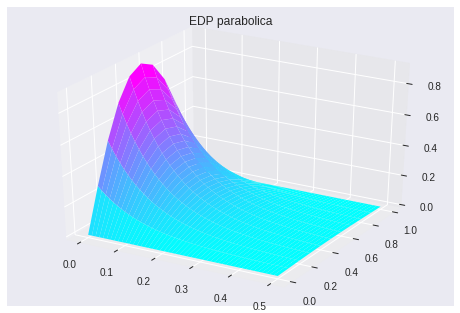

In [20]:
ax = plt.axes(projection='3d')
ax.plot_surface(tt, xx, W, cmap='cool')
ax.set_title('EDP parabolica');

## Plot 3D interactivo

In [0]:
from IPython.core.display import display, HTML
import json

def plot3D(X, Y, Z, height=600, xlabel = "X", ylabel = "Y", zlabel = "Z", initialCamera = None):

    options = {
        "width": "100%",
        "style": "surface",
        "showPerspective": True,
        "showGrid": True,
        "showShadow": False,
        "keepAspectRatio": True,
        "height": str(height) + "px"
    }

    if initialCamera:
        options["cameraPosition"] = initialCamera

    data = [ {"x": X[y,x], "y": Y[y,x], "z": Z[y,x]} for y in range(X.shape[0]) for x in range(X.shape[1]) ]
    visCode = r"""
       <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" type="text/css" rel="stylesheet" />
       <script src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
       <div id="pos" style="top:0px;left:0px;position:absolute;"></div>
       <div id="visualization"></div>
       <script type="text/javascript">
        var data = new vis.DataSet();
        data.add(""" + json.dumps(data) + """);
        var options = """ + json.dumps(options) + """;
        var container = document.getElementById("visualization");
        var graph3d = new vis.Graph3d(container, data, options);
        graph3d.on("cameraPositionChange", function(evt)
        {
            elem = document.getElementById("pos");
            elem.innerHTML = "H: " + evt.horizontal + "<br>V: " + evt.vertical + "<br>D: " + evt.distance;
        });
       </script>
    """
    htmlCode = "<iframe srcdoc='"+visCode+"' width='100%' height='" + str(height) + "px' style='border:0;' scrolling='no'> </iframe>"
    display(HTML(htmlCode))

In [22]:
plot3D(tt, xx, W)